Collecting all the necessary functions form packages

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

from skimage.color import rgb2hsv, hsv2rgb, rgb2lab, deltaE_ciede94
from skimage import io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

Finding and showing the example image

(-0.5, 1079.5, 719.5, -0.5)

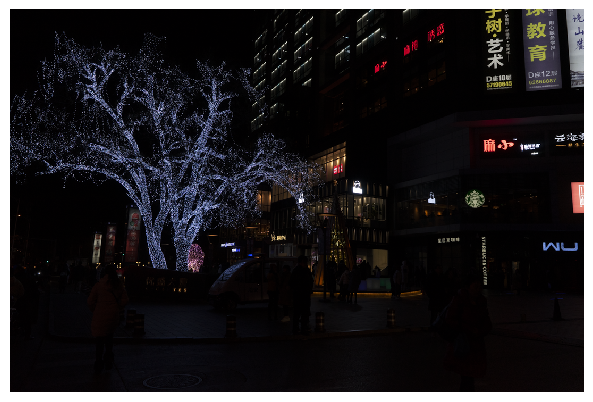

In [53]:
im_name = "C:/Users/shaia/Documents/Opgaveregning/AutoSys/1. semester/Computational billedbehandling og spektroskopi/34269_computer_imaging_and_spectroscopy/low_light_enhancement/images/dark_img_2.png"
im_org = io.imread(im_name)
io.imshow(im_org)
plt.axis("off")

Extracting the value channel of the corresponding HSV image

In [54]:
im_hsv = rgb2hsv(im_org)
V = im_hsv[:, :, 2]
V = np.uint8(V * 255)

Histogram equalization of the value channel

Text(0.5, 1.0, 'Histogram equalisation of Value channel in image')

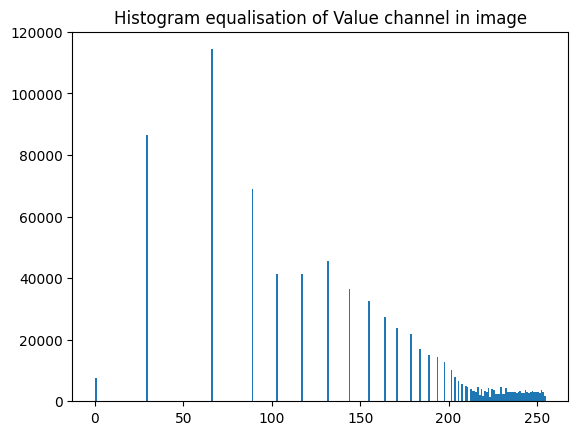

In [55]:
V_hist = cv.equalizeHist(V)

plt.figure()

plt.hist(V_hist.ravel(), bins = 256)
plt.title("Histogram equalisation of Value channel in image")

Check for constrast level in image

In [56]:
V_comp = (V_hist < V) * V
V_compMax = np.max(V_comp) / 255

if V_compMax > 0.1 and V_compMax < 0.6:
    th = 0.6
    V_1 = V.copy()
    V_2 = V_hist.copy()
    gamma = 3
elif V_compMax > 0.6 and V_compMax < 1:
    th = 1
    V_1 = V.copy()
    V_2 = V_hist.copy()
    gamma = 2.2
elif V_compMax > 0 and V_compMax < 0.1:
    th = 1
    V_1 = V.copy()
    V_2 = V.copy()
    gamma = 1.6
else:
    th = 1
    V_1 = V_hist.copy()
    V_2 = V_hist.copy()
    gamma = 1.6

Calculate the enhanced image

In [57]:
V_llp = ((V_1 / 255) <= th) * V_2
V_op = ((V_1 / 255) >= th) * V_2
V_llpup = 255 * ((V_llp / 255) ** (1 / gamma))
V_enh = V_llpup + V_op

Transform the enhanced image back to RGB

(-0.5, 1079.5, 719.5, -0.5)

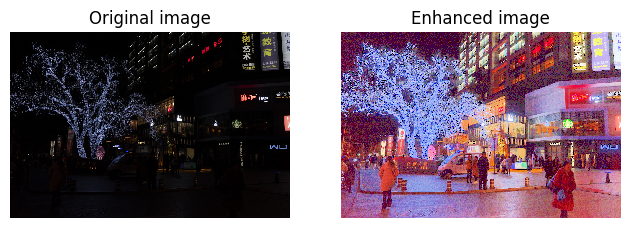

In [58]:
im_hsv[:, :, 2] = V_enh / 255
im_enh = hsv2rgb(im_hsv)
im_enh = np.uint8(im_enh * 255)

plt.figure()

plt.subplot(1, 2, 1)
io.imshow(im_org)
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
io.imshow(im_enh)
plt.title("Enhanced image")
plt.axis("off")

Plotting the final histograms

Text(0.5, 1.0, 'Histogram of the enhanced image')

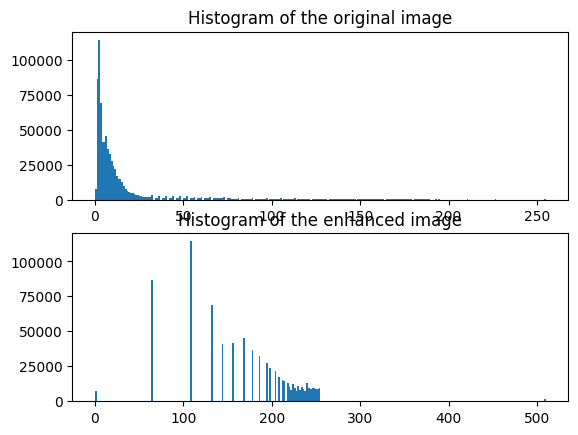

In [59]:
plt.figure()

plt.subplot(2, 1, 1)
plt.hist(V.ravel(), bins = 256)
plt.title("Histogram of the original image")

plt.subplot(2, 1, 2)
plt.hist(V_enh.ravel(), bins = 256)
plt.title("Histogram of the enhanced image")

Evaluation with SSIM, PSNR and DeltaE

SSIM result:	0.06889990592884689
PSNR result:	6.460112604233723
Delta_E average result:	55.9072777447616


Text(0.5, 1.0, '$\\Delta$E as an image')

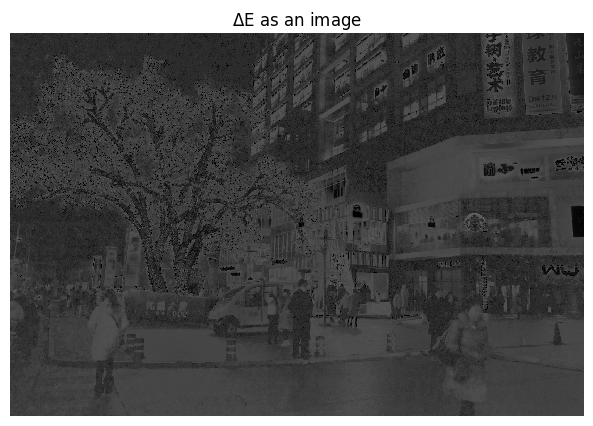

In [60]:
eval_ssim = ssim(im_org, im_enh, data_range = im_enh.max() - im_enh.min(), win_size = 3)
eval_psnr = psnr(im_org, im_enh)
im_orgLAB = rgb2lab(im_org)
im_enhLAB = rgb2lab(im_enh)
eval_coldif = deltaE_ciede94(im_orgLAB, im_enhLAB)

print("SSIM result:\t" + str(eval_ssim) + "\nPSNR result:\t" + str(eval_psnr) + "\nDelta_E average result:\t" + str(np.mean(eval_coldif)))

plt.figure()
io.imshow(np.uint8(np.round(eval_coldif)))
plt.axis("off")
plt.title(r"$\Delta$E as an image")

Save images

In [61]:
io.imsave("C:/Users/shaia/Documents/Opgaveregning/AutoSys/1. semester/Computational billedbehandling og spektroskopi/34269_computer_imaging_and_spectroscopy/results/IllAdj_Res.png", im_enh)
io.imsave("C:/Users/shaia/Documents/Opgaveregning/AutoSys/1. semester/Computational billedbehandling og spektroskopi/34269_computer_imaging_and_spectroscopy/results/IllAdj_DeltaE.png", np.uint8(np.round(eval_coldif)))